In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = load_digits(return_X_y=True)

In [2]:
X.shape, y.shape

((1797, 64), (1797,))

In [3]:
import matplotlib.pyplot as plt

# Visualize the first 10 images in the training set
def plot_digits(images, labels):
    plt.figure(figsize=(10,4))
    for i in range(10):
        plt.subplot(2,5, i+1)
        plt.imshow(images[i].reshape(8,8), cmap='gray')
        plt.title(f'label: {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

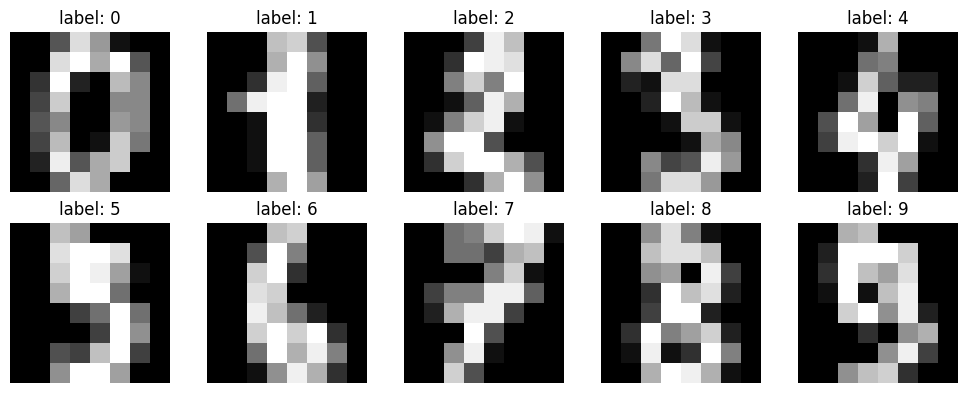

In [4]:
plot_digits(X,y)

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
# Standartize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Train a Support Vector Machine classifier
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

#Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9750

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



In [9]:
# Train a Support Vector Machine classifier kernel='poly'
clf1 = SVC(kernel='poly', random_state=42)
clf1.fit(X_train, y_train)
y_pred_poly = clf1.predict(X_test)

In [10]:
# Train a Support Vector Machine classifier kernel='rbf'
clf2 = SVC(kernel='rbf', random_state=42)
clf2.fit(X_train, y_train)
y_pred_rbf = clf2.predict(X_test)

In [11]:
diff_classifiers = accuracy_score(y_test, y_pred_poly) - accuracy_score(y_test, y_pred_rbf)
diff_classifiers

-0.016666666666666607

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

hyper_params = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

svc_model = SVC(gamma='scale')
grid = GridSearchCV(svc_model, param_grid=hyper_params, scoring='accuracy', verbose=1, cv=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [13]:
grid.best_estimator_

,C,10
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False



--- Training SVM with Polynomial Kernel

--- Performance Metrics for Polynomial Kernel SVM ---
Accuracy (Polynomial): 0.9861
F1-Score (Polynomial): 0.9861
Precision (Polynomial): 0.9864
Recall (Polynomial): 0.9861

Classification Report (Polynomial):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       1.00      1.00      1.00        35
           7       1.00      0.97      0.99        34
           8       0.94      1.00      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99

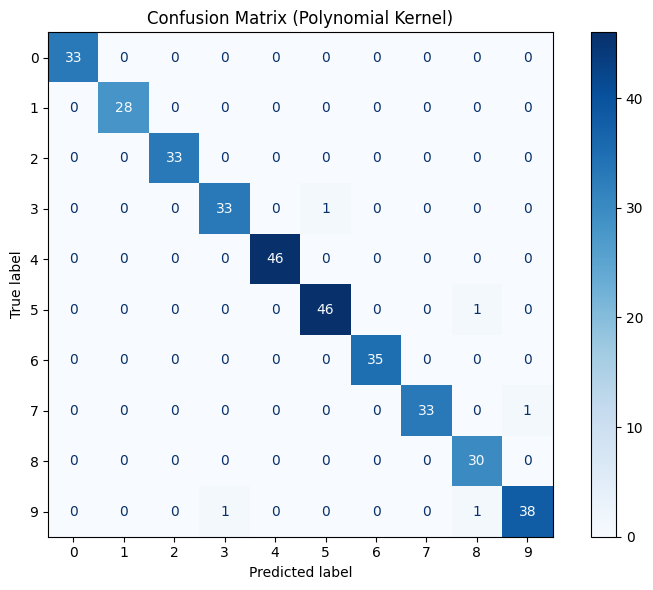

In [14]:
# Train SVM Model with Polynomial Kernel
print("\n--- Training SVM with Polynomial Kernel")
svm_poly_model = SVC(kernel='poly', degree=3, C=10, gamma='scale', random_state=42)
svm_poly_model.fit(X_train, y_train)

# Make Predictions with Polynomial Kernel
y_pred_poly = svm_poly_model.predict(X_test)

# Evaluate Polynomial Kernel SVM
print("\n--- Performance Metrics for Polynomial Kernel SVM ---")
accuracy_poly = accuracy_score(y_test, y_pred_poly)
f1_poly = f1_score(y_test, y_pred_poly, average='weighted')
precision_poly = precision_score(y_test, y_pred_poly, average='weighted')
recall_poly = recall_score(y_test, y_pred_poly, average='weighted')

print(f"Accuracy (Polynomial): {accuracy_poly:.4f}")
print(f"F1-Score (Polynomial): {f1_poly:.4f}")
print(f"Precision (Polynomial): {precision_poly:.4f}")
print(f"Recall (Polynomial): {recall_poly:.4f}")
print("\nClassification Report (Polynomial):\n", classification_report(y_test, y_pred_poly))

# --- Plot Confusion Matrix for Polynomial Kernel SVM ---
print("\n--- Plotting Confusion Matrix for Polynomial Kernel SVM ---")
cm_poly = confusion_matrix(y_test, y_pred_poly)
disp_poly = ConfusionMatrixDisplay(confusion_matrix=cm_poly, display_labels=load_digits().target_names)
fig_poly, ax_poly = plt.subplots(figsize=(8, 6))
disp_poly.plot(cmap=plt.cm.Blues, ax=ax_poly)
ax_poly.set_title("Confusion Matrix (Polynomial Kernel)")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

np.sort()